In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Exploratory Analysis of IMBD Datasets

In [2]:
df_basics = pd.read_csv("data/title.basics.tsv",sep='\t')
df_ratings = pd.read_csv("data/title.ratings.tsv",sep='\t')
# df_akas = pd.read_csv("data/title.akas.tsv",sep='\t')

/tmp/ipykernel_54667/304543757.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_basics = pd.read_csv("data/title.basics.tsv",sep='\t')


#### Basic Details 

In [3]:
print("Entries in DF Basics:", df_basics.shape[0])
print("DF Basics Columns:", ", ".join(df_basics.columns))
df_basics

Entries in DF Basics: 11528215
DF Basics Columns: tconst, titleType, primaryTitle, originalTitle, isAdult, startYear, endYear, runtimeMinutes, genres


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
...,...,...,...,...,...,...,...,...,...
11528210,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,Drama
11528211,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,Drama
11528212,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,Drama
11528213,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [4]:
print("Entries in DF Ratings:", df_ratings.shape[0])
print("DF Ratings Columns:", ", ".join(df_ratings.columns))
df_ratings

Entries in DF Ratings: 1546890
DF Ratings Columns: tconst, averageRating, numVotes


,tconst,averageRating,numVotes
0,tt0000001,5.7,2142
1,tt0000002,5.5,290
2,tt0000003,6.4,2179
3,tt0000004,5.3,186
4,tt0000005,6.2,2913
...,...,...,...
1546885,tt9916730,7.0,12
1546886,tt9916766,7.2,24
1546887,tt9916778,7.2,37
1546888,tt9916840,6.8,12


#### Filtering by Animations and Movies

In [5]:
df_basics = df_basics.loc[(df_basics["titleType"] == "movie") & (df_basics["genres"].str.contains("Animation", na=False))]
print("Filtered Entries in DF Basics:", df_basics.shape[0])
df_basics

Filtered Entries in DF Basics: 10299


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
7541,tt0007646,movie,El apóstol,El apóstol,0,1917,\N,70,"Animation,Comedy,Drama"
8714,tt0008840,movie,El apache de Londres,El apache de Londres,0,1918,\N,\N,Animation
9332,tt0009469,movie,Outwitting the Hun,Outwitting the Hun,0,1918,\N,\N,"Animation,Comedy"
9482,tt0009619,movie,Sin dejar rastros,Sin dejar rastros,0,1918,\N,\N,Animation
13922,tt0014140,movie,How Troy Was Collared,How Troy Was Collared,0,1923,\N,\N,"Animation,Comedy,History"
...,...,...,...,...,...,...,...,...,...
11520123,tt9899402,movie,Antoons Hero,Antoons Hero,0,\N,\N,\N,Animation
11520271,tt9899716,movie,Star Trek Enterprise II: Der Anfang vom Ende,Star Trek Enterprise II: Der Anfang vom Ende,0,2016,\N,58,"Animation,Sci-Fi"
11520408,tt9900060,movie,Lupin the Third: Fujiko Mine's Lie,Lupin the IIIrd: Mine Fujiko no Uso,0,2019,\N,58,"Adventure,Animation,Crime"
11524992,tt9909938,movie,Xenosaga Episode 1: Der Wille Zur Macht,Xenosaga,0,2005,\N,288,"Animation,Sci-Fi"


In [6]:
df_basics["startYear"].replace("\\N", np.nan, inplace=True)
print("Number of missing release-date entries:", df_basics["startYear"].isna().sum())

Number of missing release-date entries: 1964


/tmp/ipykernel_54667/2464014866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basics["startYear"].replace("\\N", np.nan, inplace=True)


#### Filtering Ratings by Animations via tconst

In [7]:
# Get Unique Identifiers

movie_ids = df_basics["tconst"]
df_ratings = df_ratings.loc[df_ratings["tconst"].isin(movie_ids)]
df_ratings = df_ratings.sort_values("tconst")
df_ratings

,tconst,averageRating,numVotes
2849,tt0008840,5.6,14
3072,tt0009469,6.5,21
3136,tt0009619,6.3,27
5047,tt0015532,7.8,7235
7982,tt0021309,7.6,1644
...,...,...,...
1545989,tt9894394,7.2,891
1546072,tt9896916,6.4,961
1546216,tt9899716,7.3,33
1546231,tt9900060,6.9,556


#### Basis Statistics: Countries

In [8]:
df_basics["startYear"] = df_basics["startYear"].astype(float).astype('Int64')
unq_releases = df_basics["startYear"].unique()
print("Earliest Release:", unq_releases.min())
print("Latest Release:", unq_releases.max())

Earliest Release: 1916
Latest Release: 2028


/tmp/ipykernel_54667/4056236827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basics["startYear"] = df_basics["startYear"].astype(float).astype('Int64')


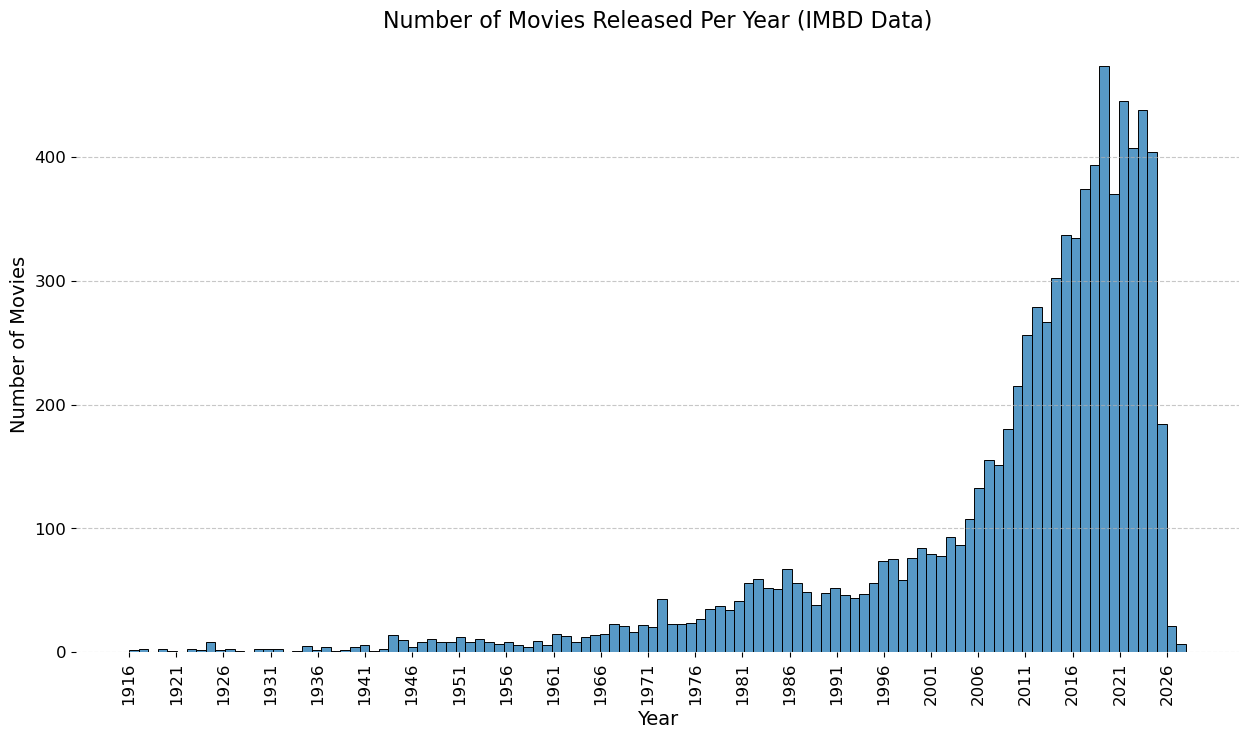

In [41]:
plt.figure(figsize=(15, 8))
sns.histplot(df_basics["startYear"], bins=len(unq_releases), kde=False)
plt.title('Number of Movies Released Per Year (IMBD Data)', fontsize= 16)
plt.xticks(rotation=90)
plt.xlabel('Year', fontsize= 14)
plt.xticks(ticks=np.arange(int(unq_releases.min()), int(unq_releases.max()) + 1, 5))
plt.ylabel('Number of Movies', fontsize= 14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('images/IMBD_animations_per_year.png')
plt.show()

#### Basic Statistics: Genres

In [22]:
# Split the genres column into multiple columns
df_genres_split = df_basics['genres'].str.split(',', expand=True)


# Rename the columns to genre_1, genre_2, etc.
df_genres_split.columns = [f'genre_{i+1}' for i in range(df_genres_split.shape[1])]
# Check if genre_1 is not 'Animation' and swap with genre_2 if necessary
df_genres_split.loc[df_genres_split['genre_1'] != 'Animation', ['genre_1', 'genre_2']] = df_genres_split.loc[df_genres_split['genre_1'] != 'Animation', ['genre_2', 'genre_1']].values
df_genres_split.loc[df_genres_split['genre_1'] != 'Animation', ['genre_1', 'genre_3']] = df_genres_split.loc[df_genres_split['genre_1'] != 'Animation', ['genre_3', 'genre_1']].values

df_basics.drop(columns=['genres'], inplace=True)

# Concatenate the original dataframe with the new genre columns
df_basics = pd.concat([df_basics, df_genres_split], axis=1)

# Display the updated dataframe
df_basics

/tmp/ipykernel_54667/4102950430.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_basics.drop(columns=['genres'], inplace=True)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genre_1,genre_2,genre_3
7541,tt0007646,movie,El apóstol,El apóstol,0,1917,\N,70,Animation,Comedy,Drama
8714,tt0008840,movie,El apache de Londres,El apache de Londres,0,1918,\N,\N,Animation,None,None
9332,tt0009469,movie,Outwitting the Hun,Outwitting the Hun,0,1918,\N,\N,Animation,Comedy,None
9482,tt0009619,movie,Sin dejar rastros,Sin dejar rastros,0,1918,\N,\N,Animation,None,None
13922,tt0014140,movie,How Troy Was Collared,How Troy Was Collared,0,1923,\N,\N,Animation,Comedy,History
...,...,...,...,...,...,...,...,...,...,...,...
11520123,tt9899402,movie,Antoons Hero,Antoons Hero,0,<NA>,\N,\N,Animation,None,None
11520271,tt9899716,movie,Star Trek Enterprise II: Der Anfang vom Ende,Star Trek Enterprise II: Der Anfang vom Ende,0,2016,\N,58,Animation,Sci-Fi,None
11520408,tt9900060,movie,Lupin the Third: Fujiko Mine's Lie,Lupin the IIIrd: Mine Fujiko no Uso,0,2019,\N,58,Animation,Adventure,Crime
11524992,tt9909938,movie,Xenosaga Episode 1: Der Wille Zur Macht,Xenosaga,0,2005,\N,288,Animation,Sci-Fi,None


In [25]:
# Replace 'None' with NaN
df_basics.replace('None', np.nan, inplace=True)

# Count percentage other genres
genre_2_count = df_basics['genre_2'].notna().sum()
genre_3_count = df_basics['genre_3'].notna().sum()

print(f"Percentage of movies with at most 1 other genres: {100 * (genre_2_count) / df_basics.shape[0]:.2f}%")
print(f"Percentage of movies with at most 2 other genres: {100 * (genre_3_count) / df_basics.shape[0]:.2f}%")

Percentage of movies with at most 1 other genres: 65.25%
Percentage of movies with at most 2 other genres: 50.67%


/tmp/ipykernel_54667/1562659669.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts, y=genre_counts.index, palette='pastel')


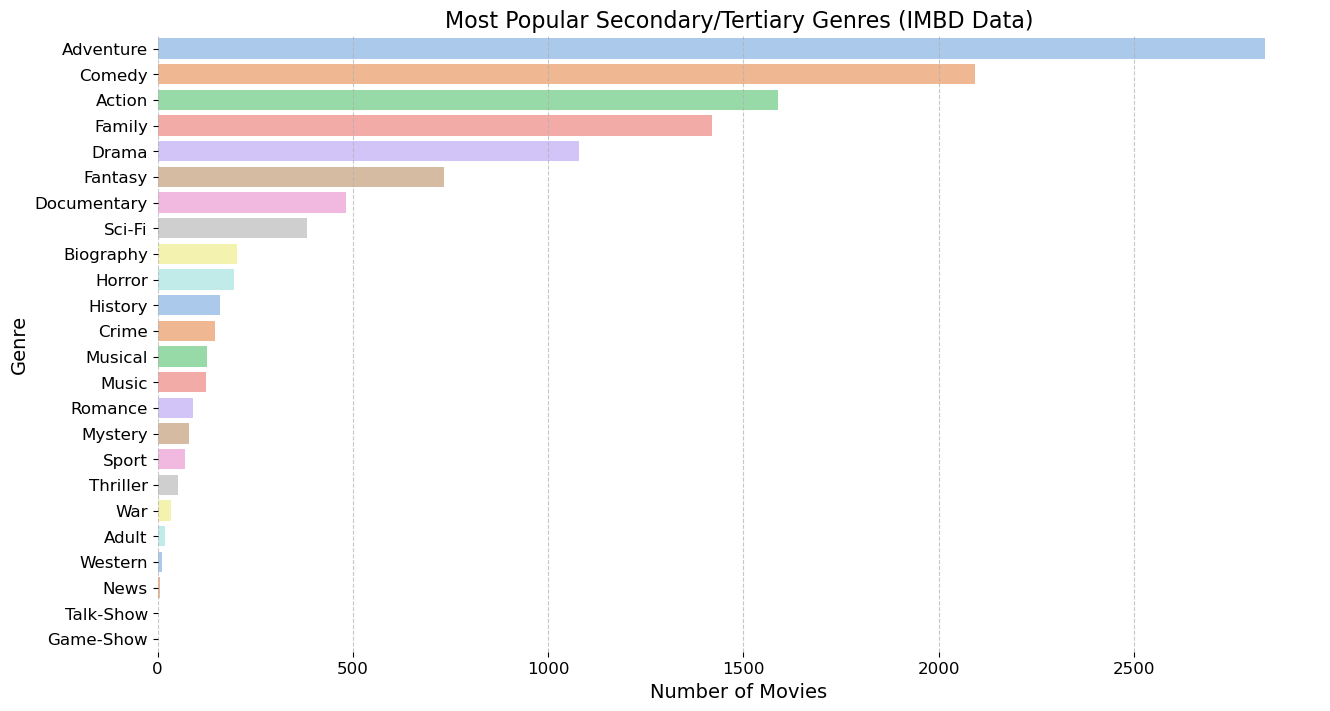

In [42]:
# New Series containing all Genre 2 and Genre 3 values
genres = pd.concat([df_basics['genre_2'], df_basics['genre_3']]).dropna()

# Count the number of occurrences of each genre
genre_counts = genres.value_counts()

# Plot the genre counts
plt.figure(figsize=(15, 8))
sns.barplot(x=genre_counts, y=genre_counts.index, palette='pastel')
plt.title('Most Popular Secondary/Tertiary Genres (IMBD Data)', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('images/IMBD_popular_genres.png')
plt.show()